In [29]:
import cv2
import matplotlib.pyplot as plt #resimler üzerinde çizim yapmak için
#çizim yapılan resimleri kaydetmek için
%matplotlib inline

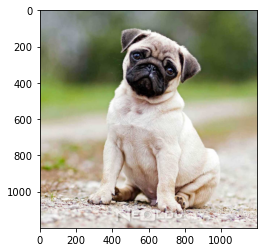

In [30]:
#gorselin buyuk halini alalim
full=cv2.imread('pug_1.jpg')
full=cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

In [31]:
full.shape

(1200, 1200, 3)

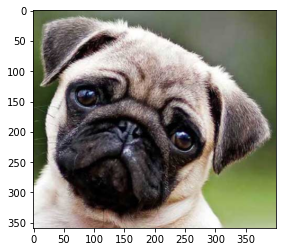

In [32]:
#köpegin yuzu 
face=cv2.imread('pug_2.png')
face=cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [33]:
face.shape

(359, 400, 3)

In [34]:
#sum fonksiyonu toplama islemi yapar
sum([1,2,3])


6

In [35]:
mystring='sum'
mystring([1,2,3])

TypeError: 'str' object is not callable

In [36]:
#bu hatanın önüne geçebilmek için eval fonksiyonunu uygulayacağız

In [37]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [38]:
myfunck=eval(mystring)
myfunck([1,2,3])

6

In [39]:
#köpegin yüz fotosunun genislik yukseklik ve renk sıralamasını degiskenlere atayalım
height, width, channels=face.shape

In [40]:
width

400

In [41]:
height

359

In [42]:
channels

3

In [43]:
#matamiksel metodları matchTemplate fonk ile uygulayacağız
my_method=eval('cv2.TM_CCOEFF')
res=cv2.matchTemplate(full,face,my_method)

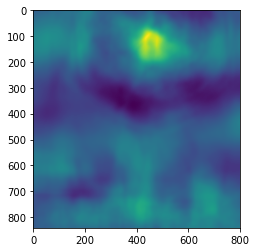

In [44]:
plt.imshow(res)

In [52]:
#gorselin buyuk halini alalim
full=cv2.imread('pug_1.jpg')
full=cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

#kopegin yuzu
face=cv2.imread('pug_2.png')
face=cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

#bu sayısal fonksiyonları https://docs.opencv.org/4.x/df/dfb/group__imgproc__object.html adresinden aldım
methods=['cv2.TM_CCOEFF','cv2.TM_CCORR_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED' ]

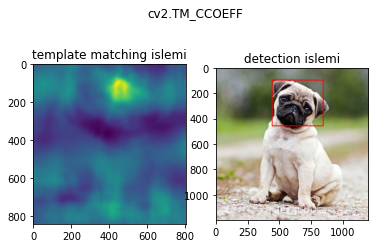

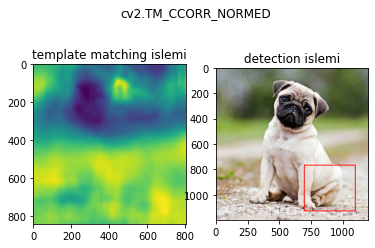

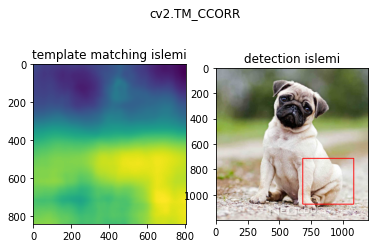

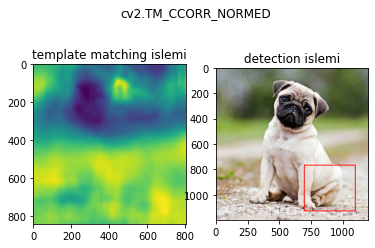

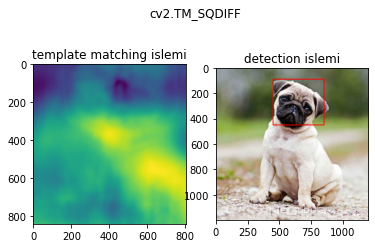

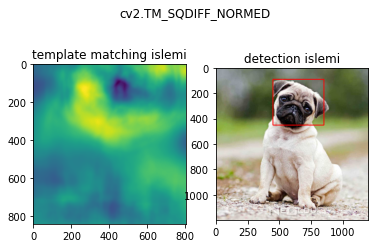

In [53]:
#methodları calıstırmak için bir for yazıyorum
for m in methods:
    
    #kopyasını al
    full_copy=full.copy()
    
    #eval uygula
    method = eval(m)
    
    res=cv2.matchTemplate(full_copy,face,method)
    
    #face nin kordinatlarını bulmak için yazıyoruz
    min_val, max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    #sol üst nokta belirliyoruz
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    
    #sağ alt nokta belirliyoruz 
    bottom_right=(top_left[0]+width, top_left[1]+height)
    
    #dikdortgeni ciz
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),5)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('template matching islemi')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('detection islemi')
    
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')
    